In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow

In [ ]:
df=pd.read_csv('/content/hourly_wages.csv')
df.head()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,5.10,0,8,21,35,1,1,0,1,0
1,4.95,0,9,42,57,1,1,0,1,0
2,6.67,0,12,1,19,0,0,0,1,0
3,4.00,0,12,4,22,0,0,0,0,0
4,7.50,0,12,17,35,0,1,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   wage_per_hour   534 non-null    float64
 1   union           534 non-null    int64  
 2   education_yrs   534 non-null    int64  
 3   experience_yrs  534 non-null    int64  
 4   age             534 non-null    int64  
 5   female          534 non-null    int64  
 6   marr            534 non-null    int64  
 7   south           534 non-null    int64  
 8   manufacturing   534 non-null    int64  
 9   construction    534 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 41.8 KB


In [ ]:
X=df.iloc[:,1:]
y=df['wage_per_hour'].values

In [ ]:
X.shape

(534, 9)

In [ ]:
X

,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,0,8,21,35,1,1,0,1,0
1,0,9,42,57,1,1,0,1,0
2,0,12,1,19,0,0,0,1,0
3,0,12,4,22,0,0,0,0,0
4,0,12,17,35,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
529,0,18,5,29,0,0,0,0,0
530,0,12,33,51,1,1,0,0,0
531,1,17,25,48,1,1,0,0,0
532,1,12,13,31,0,1,1,0,0


#Data Preprocessing

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
scaler=MinMaxScaler()

In [ ]:
X_train_scaled=scaler.fit_transform(X_train)

In [ ]:
X_test_scaled=scaler.fit_transform(X_test)

#Model

In [ ]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense,Activation,Dropout

In [ ]:
model=Sequential()

In [ ]:

#Input Layer
model.add(Dense(100,activation='relu',input_shape=(9,)))

#Hidden Layers
model.add(Dense(100,activation='relu',kernel_initializer='random_normal',bias_initializer='ones',kernel_regularizer='l1'))

model.add(Dropout(0.3))

model.add(Dense(50,activation='relu',kernel_initializer='random_normal',bias_initializer='ones',kernel_regularizer='l1'))

model.add(Dropout(0.3))

model.add(Dense(30,activation='relu',kernel_initializer='random_normal',bias_initializer='ones',kernel_regularizer='l1'))

model.add(Dropout(0.3))

model.add(Dense(20,activation='relu',kernel_initializer='random_normal',bias_initializer='ones',kernel_regularizer='l1'))
model.add(Dropout(0.3))

model.add(Dense(10,activation='relu',kernel_initializer='random_normal',bias_initializer='ones',kernel_regularizer='l1'))



In [ ]:
#Output layer
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 100)               1000      
                                                                 
 dense_15 (Dense)            (None, 100)               10100     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_16 (Dense)            (None, 50)                5050      
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_17 (Dense)            (None, 30)                1530      
                                                                 
 dropout_6 (Dropout)         (None, 30)               

#Model Compile

In [ ]:
model.compile(optimizer='rmsprop',loss='mae')

In [ ]:
model.fit(x=X_train_scaled,y=y_train,epochs=100,validation_data=(X_test_scaled,y_test))

Epoch 1/100
12/12 [==============================] - 1s 24ms/step - loss: 14.5807 - val_loss: 11.5982
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 10.4242 - val_loss: 8.3350
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 7.5207 - val_loss: 6.9914
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 6.5718 - val_loss: 6.4099
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 6.0254 - val_loss: 6.0112
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 5.5166 - val_loss: 5.5953
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 5.3726 - val_loss: 5.3535
Epoch 8/100
12/12 [==============================] - 0s 7ms/step - loss: 5.0441 - val_loss: 5.2345
Epoch 9/100
12/12 [==============================] - 0s 6ms/step - loss: 4.8624 - val_loss: 5.1066
Epoch 10/100
12/12 [==============================] - 0s 7ms/step - loss: 4.7916 - val_loss: 5.0111
Epoch

<Axes: >

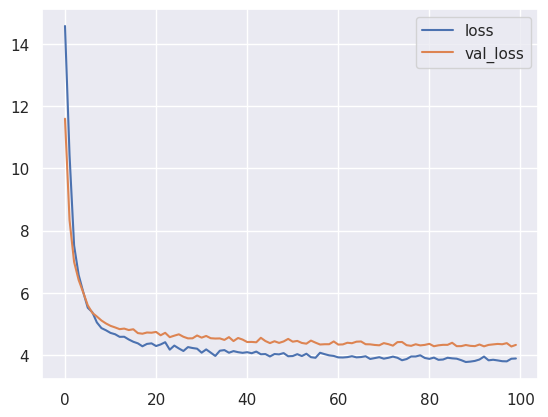

In [ ]:
#Plot
sns.set()
loss=pd.DataFrame(model.history.history)
loss.plot()

#Model 2

In [ ]:
model2=Sequential()

In [ ]:

#Input Layer
model2.add(Dense(100,activation='relu',input_shape=(9,)))

#Hidden Layers
model2.add(Dense(100,activation='relu',kernel_initializer='glorot_normal',bias_initializer='zeros'))

#model.add(Dropout(0.3))

model2.add(Dense(50,activation='relu',kernel_initializer='glorot_normal',bias_initializer='zeros'))

#model.add(Dropout(0.3))

model2.add(Dense(30,activation='relu',kernel_initializer='glorot_normal',bias_initializer='zeros'))

#model.add(Dropout(0.3))

model2.add(Dense(20,activation='relu',kernel_initializer='glorot_normal',bias_initializer='zeros'))

#model.add(Dropout(0.3))

model2.add(Dense(10,activation='relu',kernel_initializer='glorot_normal',bias_initializer='zeros'))

In [ ]:
model2.add(Dense(1))

In [ ]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 100)               1000      
                                                                 
 dense_22 (Dense)            (None, 100)               10100     
                                                                 
 dense_23 (Dense)            (None, 50)                5050      
                                                                 
 dense_24 (Dense)            (None, 30)                1530      
                                                                 
 dense_25 (Dense)            (None, 20)                620       
                                                                 
 dense_26 (Dense)            (None, 10)                210       
                                                                 
 dense_27 (Dense)            (None, 1)                

In [ ]:
model2.compile(optimizer='rmsprop',loss='mae',metrics='mse')

In [ ]:
model2.fit(x=X_train_scaled,y=y_train,epochs=100,validation_data=(X_test_scaled,y_test))

Epoch 1/100
12/12 [==============================] - 1s 23ms/step - loss: 9.0117 - mse: 106.4211 - val_loss: 9.0142 - val_mse: 109.9026
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 8.9938 - mse: 106.1187 - val_loss: 9.0011 - val_mse: 109.6675
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 8.9812 - mse: 105.8890 - val_loss: 8.9889 - val_mse: 109.4468
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 8.9690 - mse: 105.6693 - val_loss: 8.9768 - val_mse: 109.2299
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 8.9570 - mse: 105.4525 - val_loss: 8.9648 - val_mse: 109.0142
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 8.9450 - mse: 105.2372 - val_loss: 8.9528 - val_mse: 108.7991
Epoch 7/100
12/12 [==============================] - 0s 7ms/step - loss: 8.9330 - mse: 105.0254 - val_loss: 8.9408 - val_mse: 108.5843
Epoch 8/100
12/12 [==============================] - 0

<Axes: >

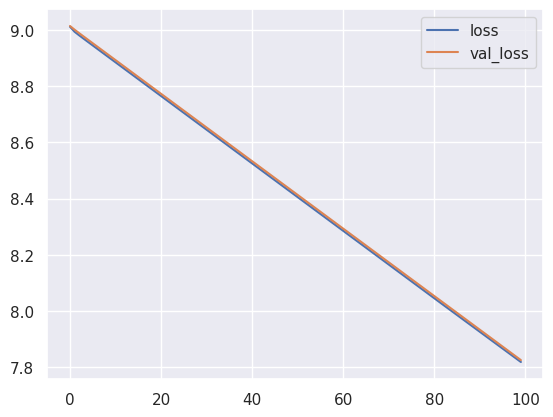

In [ ]:
loss2=pd.DataFrame(model2.history.history)
loss2[['loss','val_loss']].plot()

<Axes: >

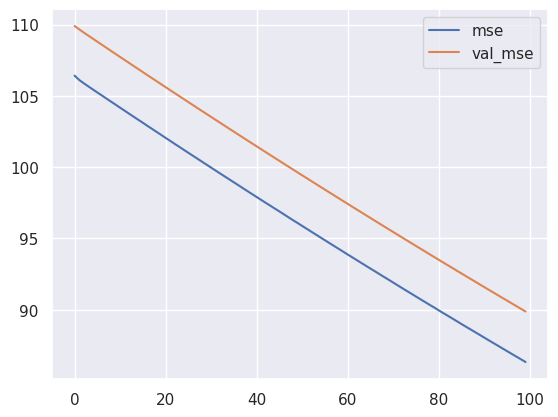

In [ ]:
loss2[['mse','val_mse']].plot()

<Axes: >

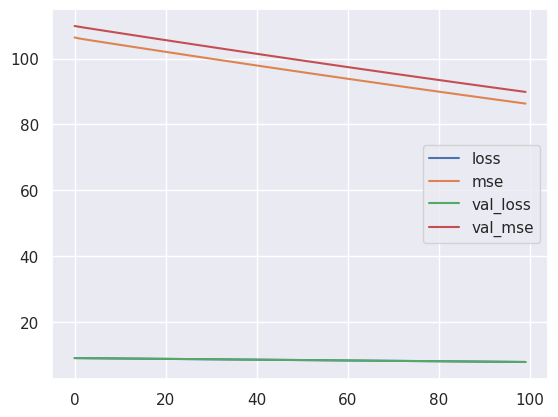

In [ ]:
loss2.plot()